# Libraries

In [12]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras

from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout

from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, MobileNetV2 
from keras.applications.mobilenet import preprocess_input
from IPython.display import Image

# Custom model architecture on Imagenet

In [13]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]


train_path = 'datasets/Train'
valid_path = 'datasets/Test'

# add preprocessing layer to the front of mob_net

MobileNetV2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in MobileNetV2.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/Train/*')

#adding mobnet with an additional ConvNet and two dense layers
model = Sequential()
model.add(MobileNetV2)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
# model,add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Dense(units=len(folders), activation="sigmoid"))
model.summary()
  



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          737344    
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              1052672   
_________________________________________________________________
dense_4 (Dense)              (None, 4096)             

# Training & Visualization

Found 784 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
11/25 [============>.................] - ETA: 13s - loss: 2.3935 - accuracy: 0.6042

C:\Users\piyush.pathak\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


25/25 [==============================] - 28s 1s/step - loss: 1.3909 - accuracy: 0.6148 - val_loss: 0.6715 - val_accuracy: 0.6087
Epoch 2/30
25/25 [==============================] - 26s 1s/step - loss: 0.4899 - accuracy: 0.7653 - val_loss: 0.4221 - val_accuracy: 0.8696
Epoch 3/30
25/25 [==============================] - 30s 1s/step - loss: 0.3494 - accuracy: 0.8533 - val_loss: 0.5036 - val_accuracy: 0.7391
Epoch 4/30
25/25 [==============================] - 28s 1s/step - loss: 0.3262 - accuracy: 0.8686 - val_loss: 0.4406 - val_accuracy: 0.8261
Epoch 5/30
25/25 [==============================] - 28s 1s/step - loss: 0.2781 - accuracy: 0.8865 - val_loss: 0.4742 - val_accuracy: 0.8696
Epoch 6/30
25/25 [==============================] - 30s 1s/step - loss: 0.2637 - accuracy: 0.8941 - val_loss: 0.6144 - val_accuracy: 0.7391
Epoch 7/30
25/25 [==============================] - 27s 1s/step - loss: 0.2289 - accuracy: 0.9209 - val_loss: 0.4501 - val_accuracy: 0.8261
Epoch 8/30
25/25 [=============

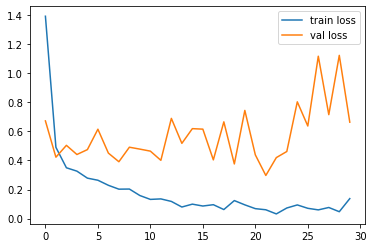

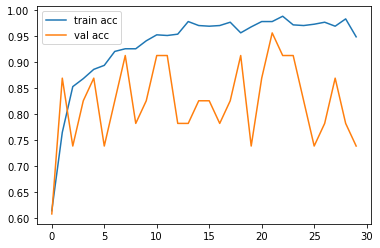

In [14]:
# Decide cost and optimization method 
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use  Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Accuracy testing

from sklearn import metrics
batch_size = 10
target_names = valid_path
Y_pred = model.predict_generator(test_set, 49 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_set.classes, y_pred))

# Model save

In [15]:
model.save('model_mobnet_custom_plaque_periodontitis.h5')


# Model Loading

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

model=load_model('model_mobnet_custom_plaque_periodontitis.h5')
model

In [15]:
20*500


10000

# Check classes

In [17]:

print(training_set.class_indices)


print(test_set.class_indices)

{'Periodontitis': 0, 'Plaque': 1}
{'Periodontitis': 0, 'Plaque': 1}


# Prediction

In [18]:
d={}
dirr = r'C:\Users\piyush.pathak\Desktop\dental_clinic\plaque_vs_peridontitis\new_data'
os.chdir(dirr)
all_images = os.listdir()
print(all_images)
for i in range(len(all_images)):
    img=image.load_img(all_images[i],target_size=(224,224))
    x=image.img_to_array(img)

    x=x/255
    x=np.expand_dims(x,axis=0)
    model.predict(x)
    d[all_images[i]]=np.argmax(model.predict(x), axis=1)
    
print('---'*30)
print('Prediction----------#############----------------')
for key,values in d.items():
    print(str(key)+"/"+str(values))
    
    

['Periodontitis1.jpg', 'Periodontitis10.jpg', 'Periodontitis2.jpg', 'Periodontitis3.jpg', 'Periodontitis4.jpg', 'periodontitis5.jpg', 'periodontitis6.jpg', 'Periodontitis7.jpg', 'periodontitis8.jpg', 'Periodontitis9.jpg', 'plaque1.jpg', 'plaque10.jpg', 'plaque11.jpg', 'plaque12.png', 'plaque2.jpg', 'plaque3.jpg', 'plaque4.jpg', 'plaque5.jpg', 'plaque6.jpg', 'plaque7.jpg', 'plaque8.jpg', 'plaque9.jpg']
------------------------------------------------------------------------------------------
Prediction----------#############----------------
Periodontitis1.jpg/[0]
Periodontitis10.jpg/[0]
Periodontitis2.jpg/[1]
Periodontitis3.jpg/[0]
Periodontitis4.jpg/[1]
periodontitis5.jpg/[1]
periodontitis6.jpg/[0]
Periodontitis7.jpg/[0]
periodontitis8.jpg/[0]
Periodontitis9.jpg/[0]
plaque1.jpg/[0]
plaque10.jpg/[0]
plaque11.jpg/[0]
plaque12.png/[1]
plaque2.jpg/[1]
plaque3.jpg/[1]
plaque4.jpg/[0]
plaque5.jpg/[1]
plaque6.jpg/[1]
plaque7.jpg/[0]
plaque8.jpg/[1]
plaque9.jpg/[1]


In [ ]:
## Confusion matrix with mob_net custom

                  periodontitis         plaque    
periodontitis           7                 3           
plaque                  5                 7                   


sensivity of periodontitis:- 70%
sensivity of plaque:- 58%


In [9]:
## Confusion matrix with mob_net

                  periodontitis         plaque    
periodontitis           4                 6           
plaque                  2                 10                   


sensivity of periodontitis:- 40%
sensivity of plaque:- 83%


0.9090909090909091

In [ ]:
## Confusion matrix with mob_net_60epoch

                  periodontitis         plaque    
periodontitis           3                  7          
plaque                  3                 9                  


sensivity of periodontitis:- 30%
sensivity of plaque:- 75%


In [ ]:
## Confusion matrix with xceptionet_net

                  periodontitis         plaque    
periodontitis           4                 6           
plaque                  3                 9                    


sensivity of periodontitis:- 40%
sensivity of plaque:- 70%
